In [1]:
#IMPORTS AND SETTINGS
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [18]:
#Getting all the .csv files
Paths_fluo = []
Paths_abs = []

#récupérer les fichiers de fluo
for file in os.listdir("results\\fluo\\csv"):
    if file.endswith(".csv"):
        Paths_fluo.append(os.path.join("results\\fluo\\csv", file))
FluopH = [] #liste des chemins d'accès pour la fluo

for p in Paths_fluo:
    if 'ph' in p:
        FluopH.append(p)
        #print(p)
#récupérer les fichiers d'abs
for file in os.listdir("results\\abs_csv"):
    if file.endswith(".xls"):
        Paths_abs.append(os.path.join("results\\abs_csv", file))
AbspH = [] #liste des chemins d'accès pour la fluo
for p in Paths_abs:
    if 'ph' in p:
        AbspH.append(p)
        #print(p)
nbph = len(AbspH)
#print(AbspH)
#print(Paths_abs)
#pH is given by FluopH[i][16:-4]
#les pH sont rangés dans le bon ordre des fichiers (dans le même ordre pour les 2) donc pas besoin de trier

In [19]:
len(A)

401

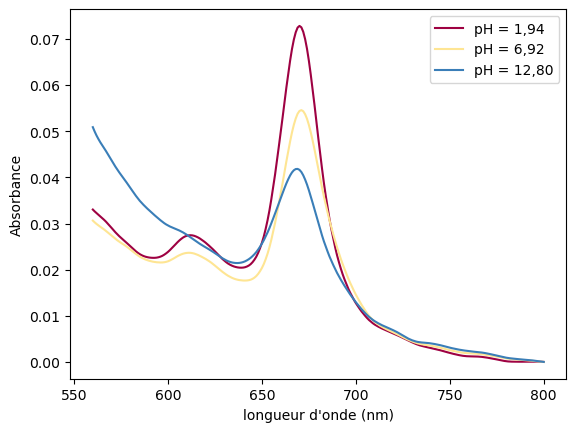

In [20]:
i = 0
Abs, LWL, C, Label = [], [], [], []
for path in AbspH:
    df = pd.read_excel(path, header=14, usecols=[0,1], names=['WL', 'A'])
    WL = np.array(df['WL'])
    A = np.array(df['A'])
    A = A - A[-1]
    tmp = str(path[21:-7]) + "," + str(path[-6:-4])
    tmp = "pH = " + tmp
    #plt.plot(WL[160:], A[160:], label=tmp, color = cm.Spectral(i/len(AbspH)))
    Abs.append(A[160:])
    LWL.append(WL[160:])
    C.append(cm.Spectral(i/len(AbspH)))
    Label.append(tmp)
    i += 1
plt.plot(LWL[0], Abs[0], label=Label[0], color=C[0])
plt.plot(LWL[5], Abs[5], label=Label[5], color=C[5])
plt.plot(LWL[-1], Abs[-1], label=Label[-1], color=C[-1])

plt.xlabel('longueur d\'onde (nm)')
plt.ylabel('Absorbance')
plt.legend()
plt.savefig("abs2.png")


In [22]:
#array de dim 3: [pH, fluo, abs]
P = np.array([[FluopH[i][22:-4], FluopH[i], AbspH[i]] for i in range(len(FluopH))]) 

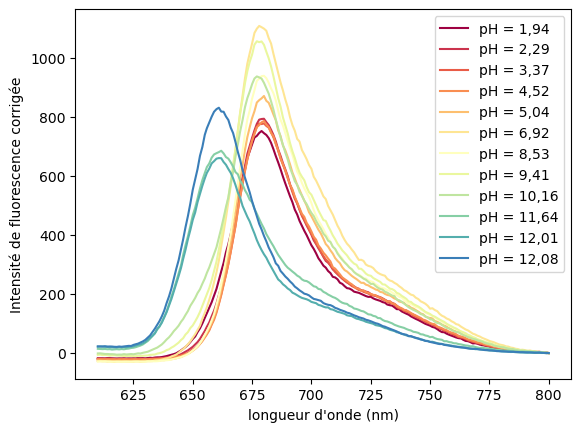

In [33]:
i = 0
LWL, LI, Lab, C = [], [], [], []
for ar in P:
    
    ph, fluo_path, abs_path = ar[:]
    ph = "pH = " + ph[:-3] + "," + ph[len(ph)-2:]
    df_fluo = pd.read_csv(fluo_path, header=1, usecols=[0,1], names=['WL', 'I'])
    df = pd.read_excel(abs_path, names=['nm', 'ABS'], header=14, usecols=[0,1])
    A_415 = df['ABS'][15]
    WL = np.array(df_fluo['WL'])
    Intensity = np.array(df_fluo['I'])/(1-10**(-A_415))
    plt.plot(WL[110:], Intensity[110:] - Intensity[-1], label="{}".format(ph), color=cm.Spectral(i/len(P)))
    i += 1
    LWL.append(WL[110:-100])
    LI.append(Intensity[110:-100] - Intensity[-1])
    Lab.append("{}".format(ph))
    C.append(cm.Spectral(i/len(P)))
               
               
    #plt.savefig("{}.png".format(fluo_path))
    #plt.clf()
#plt.plot(LWL[0], LI[0], label=Lab[0], color=C[0])
#plt.plot(LWL[-1], LI[-1], label=Lab[-1], color=C[-1])
plt.xlabel('longueur d\'onde (nm)')
plt.ylabel(r'Intensité de fluorescence corrigée')
plt.legend()
plt.savefig("fluo.png")
    #print(np.array(WL[:]))

In [8]:
for ar in Paths_abs:
    df_abs = pd.read_csv(ar)
    print(df_abs)
    """    #df = pd.read_excel(abs_path, names=['nm', 'ABS'], header=14, usecols=[0,1])
    #A_415 = df['ABS'][15]
    WL = np.array(df_abs['WL'])
    Intensity = np.array(df_abs['I'])
    #Intensity = np.array(df_fluo['I'])/(1-10**(-A_415))
    plt.plot(WL, Intensity, label="{}".format(ph))
plt.xlabel('wavelength (nm)')
plt.ylabel('Abs')
plt.legend()
plt.savefig("graph.png")"""

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 0: invalid continuation byte

10_16
11_64
12_01
12_08
1_94
2_29
3_37
4_52
5_04
6_92
8_53
9_41


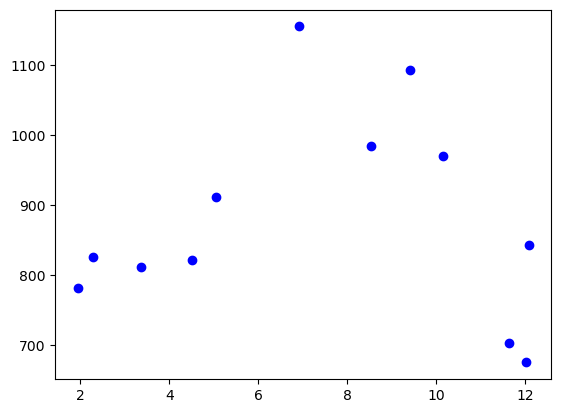

In [86]:
Imax_list = []
pHList = []
for ar in P:
    ph, fluo_path, abs_path = ar[:]
    df_fluo = pd.read_csv(fluo_path, header=1, usecols=[0,1], names=['WL', 'I'])
    df = pd.read_excel(abs_path, names=['nm', 'ABS'], header=14, usecols=[0,1])
    A_415 = df['ABS'][15]
    WL = np.array(df_fluo['WL'])
    Imax = max(np.array(df_fluo['I'])/(1-10**(-A_415)))
    Imax_list.append(Imax)
    print(ph)
    if len(ph) == 4:
        ph1 = int(ph[:1])
        ph2= int(ph[2:])
    else:
        
        ph1 = int(ph[:2])
        ph2= int(ph[3:])
    pHList.append(ph1+ph2*(10**-2))
    
    #print(ph1+ph2*10^(-2))
    
plt.plot(pHList, Imax_list, 'bo', linestyle="None")
plt.savefig("imaxph.png")

In [50]:
df = pd.read_excel(P[0, 2], names=['nm', 'ABS'], header=14, usecols=[0,1])
#print(df['Comedy_Score'].where(df['Rating_Score'] < 50))
#print(df['ABS'].where(df['nm'] > 415))
A_415 = df['ABS'][15]
print(A_415)

0.200305


In [33]:
#open one csv file
df = pd.read_csv(Paths[0], header=1, usecols=[0,1])
ar = df.to_numpy()
#ar.shape
#df

,Wavelength (nm),Intensity (a.u.)
0,500.000000,15.805755
1,501.040008,15.433372
2,501.940002,15.424923
3,502.980011,15.220365
4,504.019989,14.783378
...,...,...
296,796.020019,41.417233
297,796.979981,40.638920
298,797.940002,38.983265
299,799.039978,38.240273
